# 데이터 로딩 및 구조 분석
1. url, product_name 은 상품을 식별하는 역할
2. reviewer_name, review_title, review_text, **review_rating**은 실질적인 리뷰와 관련된 내용
3. verified_purchase는 실제 상품을 구매했는지 여부
4. helpful_count는 리뷰에 대한 추천 수
5. scraped_at은 데이터 추출 시간으로 필요 없는 데이터
6. uniq_id는 데이터 식별 이름으로 필요 없는 데이터

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('./amazon_uk_shoes_products_dataset_2021_12.csv')

In [2]:
data.columns

Index(['url', 'product_name', 'reviewer_name', 'review_title', 'review_text',
       'review_rating', 'verified_purchase', 'review_date', 'helpful_count',
       'uniq_id', 'scraped_at'],
      dtype='object')

In [3]:
data.describe()

,review_rating
count,6823.000000
mean,4.132493
std,1.336969
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [4]:
data.drop(['review_rating'], axis=1).describe()

,url,product_name,reviewer_name,review_title,review_text,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
count,6823,6823,6823,6822,6814,6823,6823,1953,6823,6823
unique,1087,1086,5525,5464,6537,2,3877,55,6641,194
top,https://www.amazon.co.uk/dp/B08BT2WPVB,"Teva K Hurricane 3, Balboa Sodalite Blue, 12 U...",Amazon Customer,Five Stars,Love them,True,Reviewed in the United States on 2 July 2021,One person found this helpful,e14c62fa-0562-5d7d-b662-3809768550ae,24/12/2021 02:28:48
freq,10,10,318,67,9,6810,11,852,2,83


## 결측치 처리

In [5]:
data.isnull().sum()

url                     0
product_name            0
reviewer_name           0
review_title            1
review_text             9
review_rating           0
verified_purchase       0
review_date             0
helpful_count        4870
uniq_id                 0
scraped_at              0
dtype: int64

helpful_count는 0명인 경우 NaN 처리한 것으로 보인다<br>
그러므로 데이터를 제거하지 않고 나중에 0으로 치환하여 준다.

나머지 review_title, review_text는 단순히 작성하지 않은 경우로 추측된다.<br>
전체에서 데이터 개수가 10여개로 비율이 높지 않으므로 제거한다.

In [6]:
data[(data['review_title'].isnull()) | (data['review_text'].isnull())]

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
309,https://www.amazon.co.uk/dp/B08V5RVYWB,"MARCO TOZZI Women's 2-2-83701-27 Sneaker, Cogn...",Josefa m l,Viene defectuoso,NaN,1.0,True,Reviewed in Spain on 12 December 2021,NaN,d916809a-6824-501f-b935-c5f7849d336a,24/12/2021 02:26:32
351,https://www.amazon.co.uk/dp/B08KL37ZH9,"PUMA Men's Shuffle Sneaker, White White Team G...",Diego Gonzalez,Muy buen producto,NaN,5.0,True,Reviewed in Mexico on 12 October 2021,NaN,9621238f-c299-5049-9f4b-43fde1f94dbb,24/12/2021 02:26:33
944,https://www.amazon.co.uk/dp/B08K4BFM9F,"PUMA Women's Ultra TRILLER Cross Trainer, Blac...",Fulvina Montisano,No me agrado la pieza plastica del final,NaN,3.0,True,Reviewed in the United States on 2 November 2021,NaN,d27bdd6c-3841-50cf-ae30-b13d86bb95f2,24/12/2021 02:26:50
1698,https://www.amazon.co.uk/dp/B08LPSZNQB,"Calvin Klein Women's Camryn Sneaker, Blue426, ...",Valod,Good sneakers,NaN,5.0,True,Reviewed in the United States on 2 June 2021,2 people found this helpful,44a4f526-8486-5616-a1ff-245da2d674ac,24/12/2021 02:27:11
3402,https://www.amazon.co.uk/dp/B07WSJ4H6R,Reebok Work Fusion Flexweave Cage,Eliezer Dominguez,Me entregaron un producto distinto al que habí...,NaN,1.0,True,Reviewed in the United States on 30 June 2021,NaN,9f0591c4-3f59-59f4-872e-8a03124df6b3,24/12/2021 02:28:06
3467,https://www.amazon.co.uk/dp/B07K26DW3N,Champion Men&#39;s 93Eighteen,Art Patino,NaN,My son is very happy with his new pair of cham...,5.0,True,Reviewed in the United States on 5 November 2019,NaN,f5580b8b-86be-50b9-8fbe-0b69b669b148,24/12/2021 02:28:07
3913,https://www.amazon.co.uk/dp/B08KL1NM93,"PUMA Women's Ultra TRILLER Cross Trainer, Blac...",Fulvina Montisano,No me agrado la pieza plastica del final,NaN,3.0,True,Reviewed in the United States on 2 November 2021,NaN,d27bdd6c-3841-50cf-ae30-b13d86bb95f2,24/12/2021 02:28:17
4594,https://www.amazon.co.uk/dp/B07W5XNWFL,CMP – F.lli Campagnolo Men's Aquarii 2.0 Hikin...,Aleksander Sokolowski,Wspaniały,NaN,5.0,True,Reviewed in Poland on 2 June 2021,NaN,c7a68647-8f3f-549d-aed9-92061757e71d,24/12/2021 02:28:35
5278,https://www.amazon.co.uk/dp/B0846JQ5ZY,"BOSS Men's Saturn_Lowp_ltpf Sneaker, Dark Blue...",suhail,Très mauvais produits chaussure ont changé la ...,NaN,1.0,True,Reviewed in France on 5 August 2021,One person found this helpful,19aea8ae-da4d-539c-b7e1-a309aac97cf7,24/12/2021 02:28:50
5984,https://www.amazon.co.uk/dp/B08XXL5W7C,Saucony Shadow Original Black/Iridescent 5.5 B...,Roberta Imprescia,Scarpe perfette comodissime e leggere... Spedi...,NaN,5.0,True,Reviewed in Italy on 9 June 2021,One person found this helpful,542154e1-3799-5f2b-bf4b-7f9359a7cf76,24/12/2021 02:29:07


In [7]:
#결측치 제거
data = data[data['review_title'].notnull() & data['review_text'].notnull()]
data.isnull().sum()

url                     0
product_name            0
reviewer_name           0
review_title            0
review_text             0
review_rating           0
verified_purchase       0
review_date             0
helpful_count        4863
uniq_id                 0
scraped_at              0
dtype: int64

### 데이터 정제 & 데이터 타입 확인

In [8]:
data.dtypes

url                   object
product_name          object
reviewer_name         object
review_title          object
review_text           object
review_rating        float64
verified_purchase       bool
review_date           object
helpful_count         object
uniq_id               object
scraped_at            object
dtype: object

* scraped_at은 데이터를 크롤링한 날짜를 의미하는 것으로 추측된다.
* uniq_id는 데이터를 구분하기 위한 index인것으로 보인다.
* url은 상품이 포함되어 있는 아마존 페이지를 가리킨다.

이 세 데이터는 어느 경우에도 유의미한 의미를 가지고 있다고 보기 어려우므로 미리 제거한다.

In [9]:
data['product_name'] = data['product_name'].astype('string')
data['reviewer_name'] = data['reviewer_name'].astype('string')
data['review_title'] = data['review_title'].astype('string')
data['review_text'] = data['review_text'].astype('string')


data = data.drop(columns='scraped_at')
data = data.drop(columns='uniq_id')
data = data.drop(columns='url')

### 'helpful_count' 데이터를 정재
데이터의 형식을 파악한 후 적절히 문자열을 처리하여 숫자 데이터로 전환

In [10]:
#데이터 형식
set(data['helpful_count'])

{'10 people found this helpful',
 '108 people found this helpful',
 '11 people found this helpful',
 '12 people found this helpful',
 '13 people found this helpful',
 '14 people found this helpful',
 '140 people found this helpful',
 '15 people found this helpful',
 '16 people found this helpful',
 '165 people found this helpful',
 '17 people found this helpful',
 '18 people found this helpful',
 '19 people found this helpful',
 '2 people found this helpful',
 '20 people found this helpful',
 '21 people found this helpful',
 '22 people found this helpful',
 '23 people found this helpful',
 '24 people found this helpful',
 '25 people found this helpful',
 '26 people found this helpful',
 '27 people found this helpful',
 '28 people found this helpful',
 '29 people found this helpful',
 '3 people found this helpful',
 '30 people found this helpful',
 '31 people found this helpful',
 '32 people found this helpful',
 '33 people found this helpful',
 '34 people found this helpful',
 '35 peop

In [11]:
def clean_helpful_count(value):
    if pd.isna(value):
        return 0  # nan 값을 0으로 변환
    elif 'person found this helpful' in value:
        return 1  # 'One person found this helpful'의 경우 1로 처리
    else:
        # 'x people found this helpful'에서 숫자만 추출하여 정수로 변환
        return int(value.split()[0])
data['helpful_count'] = data['helpful_count'].apply(clean_helpful_count)

### review_date를 정제

리뷰 지역과 날짜로 이루어져 있으므로 적절히 처리

예시<br>
Reviewed in the United States on 2 June 2020<br>
-><br>
지역: United States<br>
날짜: 2020년 6월 2일

In [12]:
def extract_location_date(review):
    # 지역과 날짜를 분리
    parts = review.split(' on ')
    location = parts[0].replace('Reviewed in ', '')
    date = pd.to_datetime(parts[1], format='%d %B %Y')
    return location.strip(), date

data[['location', 'review_date']] = data['review_date'].apply(extract_location_date).tolist()
data['location'] = data['location'].astype('category')

# 데이터 확인

남아 있는 9개의 항목을 확인

In [13]:
data.dtypes

product_name         string[python]
reviewer_name        string[python]
review_title         string[python]
review_text          string[python]
review_rating               float64
verified_purchase              bool
review_date          datetime64[ns]
helpful_count                 int64
location                   category
dtype: object

In [14]:
data.describe()

,review_rating,review_date,helpful_count
count,6813.000000,6813,6813.000000
mean,4.133568,2020-07-02 21:29:05.310436096,1.269925
min,1.000000,2010-04-22 00:00:00,0.000000
25%,4.000000,2019-11-25 00:00:00,0.000000
50%,5.000000,2020-11-20 00:00:00,0.000000
75%,5.000000,2021-06-14 00:00:00,1.000000
max,5.000000,2021-12-20 00:00:00,165.000000
std,1.335986,NaN,5.500502


In [15]:
data.drop(['review_rating', 'review_date', 'helpful_count'], axis=1).describe()

,product_name,reviewer_name,review_title,review_text,verified_purchase,location
count,6813,6813,6813,6813,6813,6813
unique,1086,5516,5457,6536,2,13
top,"Teva K Hurricane 3, Balboa Sodalite Blue, 12 U...",Amazon Customer,Five Stars,Love them,True,the United States
freq,10,318,67,9,6800,3241


# 분석 시작
* verified_purchase	는 실제 구매했는지 여부를 나타낸다.<br>
이 값이 False인 경우 리뷰의 진정성을 확신할 수 없다.<br>
그러므로 데이터를 제외한다.<br>
판단 근거: https://amzadvisers.com/ko/verified-purchase-reviews/<br>

* review_text의 최대 빈도가 67이다.<br>
모든 글자가 똑같은 리뷰가 67회나 나타났다는 의미이다.<br>
경우에 따라 결과에 악영향을 미칠수 있으므로 적절한 처리가 필요하다.<br>

* review_title에도 똑같은 현상이 나타난다.<br>
하지만 제목이라는 특성상 내용이 겹칠 확률이 높으므로 비교적 영향은 적을 것으로 보인다.<br>

* product_name의 최대 빈도가 10이다.<br>
한 물품당 리뷰 횟수가 최종 물품 평가와 어떻게 이어질지 확실한 판단이 불가능 하므로 특별한 처리는 하지 않을 것이다.<br>

* location의 종류가 13이다.<br>
이를 통해 리뷰 언어가 영어가 아닌 리뷰가 존재할 가능성을 확인할 수 있다.<br>
실제로 데이터를 확인해보면 영어가 아닌 데이터를 확인할 수 있다.<br>


## 중복되는 review_text 처리
* 3회 이상 반복되는 리뷰는 예외 없이 1,2 단어로 구성된 리뷰이다.<br>

* 리뷰에서 사용되는 단어의 개수를 분석해본 결과 1~7000개의 단어가 사용된 리뷰가 특별한 편중없이 나타난다.<br>
리뷰가 1,2단어로 이루어 졌다고 필터링 하는 것은 적절하지 않은 것으로 판단된다.

* 분석 중 몇가지 특이사항을 발견할 수 있다.<br>
    1. 👍와 같이 특수 문자가 발견된다.
    2. 리뷰가 다양한 언어로 작성되어 있다. (예: 스페인어: perfecto, 일본어....)


결론
1. 같은 단어가 반복된다 하더라도 이는 일반적인 현상으로 필터링은 부적절 하다.
2. 실제 분석을 할때 특수문자 처리, 다중언어 처리가 필요하다.

#### 단어 수에 따른 양상을 파악할 것이다.
빈도수가 2,3 인 경우와 4이상인 경우로 나누어 분석하였다.<br>
plt를 사용하여 단어 수와 빈도수를 분석하였다.

In [16]:
#모든 글자가 같은 리뷰를 계산
frequencies = data.groupby('review_text')['review_text'].transform('size')
data['freq'] = frequencies

# 각 리뷰의 단어 수를 계산
word_count = data['review_text'].apply(lambda x: len(x.split()))
data['word_count'] = word_count

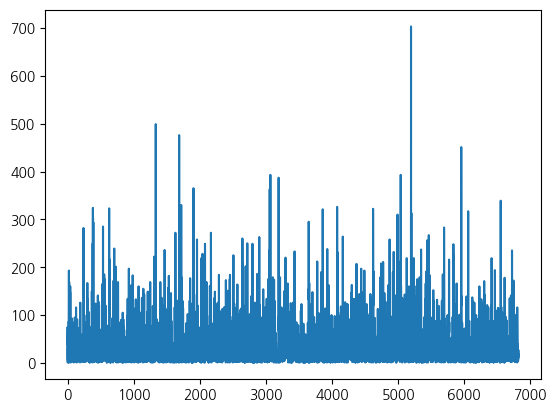

In [17]:
plt.plot(word_count)

빈도수가 3 이상인 행만을 필터링 하였다<br>
대체로 perfect, good과 같은 한, 두단어 평가인 것을 확인할 수 있다.<br>

In [18]:
# 빈도수가 3 이상인 행만을 필터링
f=4
print(len(data[frequencies >= f]))
print('-'*30)
count =0

data[frequencies >= f]

60
------------------------------


,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,location,freq,word_count
3,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,2021-04-22,0,the United States,5,1
140,"Clarks Men's Step Isle Lace Sneaker, Rust Canv...",Sandij,Comfort is wonderful for my husband.,Excellent,5.0,True,2018-06-04,0,the United States,4,1
367,New Balance Unisex Adults’ MCH796PD Industrial...,Ignacio madrazo,duraderos,Muy cómodos,5.0,True,2020-12-19,0,Mexico,5,2
458,"ASICS - Mens Hypergel-Kan Shoes, 8.5 UK, Black...",sam,Parfait,Parfait,5.0,True,2020-02-20,0,France,8,1
594,Reef Little Ahi Convertible Kids Sandals UK 5-...,Paloma Camilo,Bien,Bien,5.0,True,2020-01-19,0,the United States,4,1
620,"Sperry Top-Sider Women's Pier View Shoe, Navy,...",Kim,Perfect,Love them,5.0,True,2020-03-02,0,Canada,9,2
625,"Sperry Top-Sider Women's Pier View Shoe, Navy,...",Lorine Basile,Perfect fit,Love them,5.0,True,2020-08-21,0,Canada,9,2
652,"Desigual Shoes_cosmic Animal, Women’s Low-Top ...",Amandine Bober,Ras,Bien,5.0,True,2019-02-24,0,France,4,1
763,Reebok unisex-child Yourflex Train 9.0 Yourfle...,Leterran James,Five Stars,Great,5.0,True,2018-08-10,0,the United States,5,1
826,"Desigual Women's Shoes_Cosmic_Leopard Sneaker,...",Coralie Tournel,Je recommande à donfn,Parfait,5.0,True,2021-06-07,0,France,8,1


In [19]:
# 빈도수가 3인 행만을 필터링
f=3
print(len(data[frequencies == f]))
print('-'*30)
count =0
for i in data[frequencies == f]['review_text']:
    print(i)
    print('-'*30)
    count+=1

30
------------------------------
Perfectas
------------------------------
Perfect
------------------------------
Gut
------------------------------
Great shoes
------------------------------
Perfect
------------------------------
Sehr schön
------------------------------
Perfectas
------------------------------
Great shoes
------------------------------
Good
------------------------------
Good
------------------------------
Gut
------------------------------
Ottimo
------------------------------
Good
------------------------------
Nice
------------------------------
Great shoe
------------------------------
Great shoe
------------------------------
Perfect
------------------------------
Gut
------------------------------
Great shoes
------------------------------
As expected
------------------------------
Ottimo
------------------------------
Nice
------------------------------
As expected
------------------------------
Sehr schön
------------------------------
As expected
-----------

In [20]:
# 빈도수가 2인 행만을 필터링
f=2
print(len(data[frequencies == f]))
print('-'*30)
count =0
for i in data[frequencies == f]['review_text']:
    print(i)
    print('-'*30)
    count+=1

416
------------------------------
Good quality
------------------------------
Good shoes
------------------------------
Great buy
------------------------------
Muy bonito. Muy cómodo. Muy bueno
------------------------------
Muy bonitas y elegantes. Muy buenos materiales y acabados
------------------------------
Très belles chaussures, très confortables, pointure juste.J'en suis très satisfait !
------------------------------
See DanGeorge review it is accurate .... plus after 2days of wearing the Reebok printed label started wear off! The sole of the shoe is so thin you can feel a pebble ...... very unhappy with the supplier and with Amazon for promoting this garbage!!!!!!  And now I am out almost $130.00.  THANK YOU AMAZON!Follow-Up 05/28/21 Went to the Reebok Outlook Mall Store they told me this shoe model # is not one of theirs shoes.....I tried to make them work for a week.  They were so uncomfortable to wear I bought insoles to try to make them comfortable didn't work....after 

## review title
review text를 분석한 결과를 상기해 본 결과 review title이 중복되는 것은 일반적인 현상일 것으로 보인다.<br>
특별한 처리를 해야할 이유를 발견할 수 없다.

In [21]:
#모든 글자가 같은 리뷰를 계산
frequencies = data.groupby('review_title')['review_title'].transform('size')
data['freq_title'] = frequencies

In [22]:
data[frequencies>=3]

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,location,freq,word_count,freq_title
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,2021-01-20,0,the United States,2,2,7
3,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,2021-04-22,0,the United States,5,1,9
6,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Cliente,Molto belle,"Le scarpe sono molto belle, calzano perfettamente",5.0,True,2021-04-08,2,Italy,1,7,5
11,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Alessio,Perfetto,Scarpa perfetta e davvero molto bella la mia r...,5.0,True,2021-06-07,0,Italy,1,15,7
15,"adidas Women's Retrorun Shoes Running, Core Bl...",Lynn Maclean,Disappointed,This is the second pair I bought. Loved the fi...,2.0,True,2021-10-21,0,Canada,1,50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
6789,"Nautica Men&#39;s Spinnaker Lace-Up Boat Shoe,...",Diego d.,Excelente producto,"Excelente producto, tal cual se describe. Entr...",5.0,True,2019-09-30,0,Mexico,1,13,18
6801,Skechers Women&#39;s Breathe-Easy-Days End Sne...,garden-lady,Comfortable shoe,I like the ease of slipping my foot into the s...,5.0,True,2021-05-04,0,the United States,1,16,3
6807,adidas Zx 2k Boost Mens Fv9993 Size 11,ceteris paribus,Very comfy,Right from the get go put them on and wore the...,5.0,True,2021-10-28,0,the United States,2,54,6
6812,adidas Zx 2k Boost Mens Fv9993 Size 11,Amazon Customer,Comfortable,Walking on clouds.,5.0,True,2021-06-13,0,the United States,2,3,38


## 실제로 구매하지 않은 경우 처리
* 세일 기간 중 구매 혹은 다른 사이트에서의 구매 등 진정성이 없을 가능성이 높은 리뷰들이다.
* 예외 없이 데이터에서 제외한다.

In [23]:
data = data[data['verified_purchase']==True]

## location 과 언어 처리
영어 이외의 언어로 작성된 리뷰가 영어로 작성된 리뷰보다 더 많은 것을 확인할 수 있다.<br>
이것은 영어 이외의 데이터도 결과에 반드시 반영 되어야 함을 의미한다.<br>
이를 위해 외국어 번역 기능을 사용하는 것이 적절할 것으로 판단된다.


C:\Users\april\AppData\Local\Temp\ipykernel_3804\2346141986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co = data.groupby('location').agg('count')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'India'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'Japan'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Singapore'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Sweden'),
  Text(12, 0, 'the United States')])

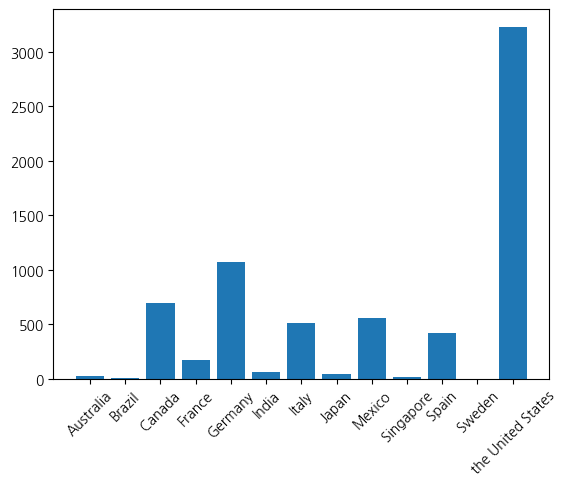

In [24]:
co = data.groupby('location').agg('count')

plt.bar(co.index, co['freq'])
plt.xticks(rotation=45)

In [25]:
len(data[data['location']!='the United States'])/len(data[data['location']=='the United States'])

1.1059151440074326

In [26]:
data[data['location']!='the United States']['location'][10]

'Germany'

## 에러 처리
원본 데이터를 생성할때 오류가 있을 경우 The media could not 라는 문구가 생성된다. 적절히 처리하여야 한다.

In [27]:
tt = data[data['review_text'].str.contains('The media could not', na=False)]

In [28]:
i =0
for k in tt['review_text']:
    print(k.encode())
    if i>=0:
        break

b'The media could not be loaded.\n                \n\n\n\n\n  \xc2\xa0Ottimo prodotto numero esatto scarpa comodissima ottimo'


In [29]:
data[data['review_text'].str.contains('The media could not', na=False)]

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,location,freq,word_count,freq_title
579,Diadora - Sneakers Camaro WN for Woman (UK 4),Fabio Eleonora,numero esatto scarpa comodissima,The media could not be loaded. ...,4.0,True,2020-04-21,4,Italy,1,13,1
983,"Diadora Girls Game P High Ps Crib Shoe, White,...",Shputim,...,The media could not be loaded. ...,1.0,True,2020-12-17,1,Italy,1,14,1
1210,"adidas unisex-child Racer TR 2.0,Ink/Copper/pi...",Giordani,👍👍👍,The media could not be loaded. ...,5.0,True,2021-10-19,0,Canada,1,7,1
1533,"Mizuno Wave Equate 5, Men's Running, MykonosB/...",Bruce,Running grand confort,The media could not be loaded. ...,5.0,True,2021-10-07,3,France,1,182,1
1886,"Primigi Baby Boys PTI Gore-tex 43629 Boots, Bl...",Bilei Eduard,usato non nuovo,The media could not be loaded. ...,1.0,True,2020-12-16,0,Italy,1,19,1
2322,adidas Originals Women's Iniki Runner CLS W Ru...,Amazon Customer,love it,The media could not be loaded. ...,5.0,True,2019-04-22,0,the United States,1,17,1
2391,"Reebok Little Kid Classic Leather Sneaker,Blac...",Smiley,Shows is not real,The media could not be loaded. ...,3.0,True,2021-12-01,0,the United States,1,31,1
2417,Cole Haan Women's Zerogrand OVERTAKE All Terra...,arisleyda,Muy buena compra,The media could not be loaded. ...,5.0,True,2021-06-30,1,the United States,1,11,3
2510,"Geox boy J MUNFREY C Low-Top Sneakers, Grey (G...",CLIM,"Una luce per le sue piccole, ma grandi avventure!",The media could not be loaded. ...,5.0,True,2021-02-11,0,Italy,1,225,1
3028,"FootJoy Men's Flex XP Golf Shoes, Black, 6 UK",judith l carpenter,Golf shoes click! Ugh,The media could not be loaded. ...,2.0,True,2020-03-05,35,the United States,1,30,1


In [30]:
data['review_text'] = data['review_text'].apply(lambda x : x.replace("\xc2\xa0", " ").replace('The media could not be loaded.\n                \n\n\n\n\n  ','').strip())

## 번역기 사용시 주의 사항
translate_all_review_and_title 함수는 굉장히 오래걸리는 작업입니다. DeepL Api를 활용하여 동작합니다.<br>
총 실행시간 1~3시간 정도를 요구할 것으로 보입니다.<br>
translation_progress.pkl에 중간 실행결과를 저장하고 있어서 중간에 실행이 종료되어도 자동으로 이어서 작업을 계속해 줍니다.<br>
미리 실행을 해놓아서 실제 작동 시간은 길지 않으나 만약 처음부터 실행시키고 싶다면 translation_progress.pkl파일을 삭제하면 됩니다.<br>


만약 번역기가 작동하는 것을 테스트 하고 싶으시면 DeepL api키를 trans.py 스크립트에 적절히 입력해 준 다음, translation_progress.pkl파일을 삭제하면 됩니다.<br>
최종 결과물은 updated_data.pkl에 백업해 놓았습니다.<br>
option이 Flase이면 미리 실행한 결과를 복구합니다. 시간을 절약할 수 있습니다.<br>

사용된 외부 라이브러리 및 API
* DeepL API
* langid.py


In [31]:
%pip install langid
import trans
import pickle

data.to_pickle('data.pkl')
options =True
if options:
    translated = trans.translate_all_review_and_title(data)
else:
    with open('updated_data.pkl', 'rb') as f:
        translated = pickle.load(f)
data = translated


Note: you may need to restart the kernel to use updated packages.


2024-06-22 00:54:24,196 - INFO - BackUp: 6144, mi dovete scusare il pacco è arrivato, l'ìha prrso un mio vicino di casa, ma è tornato solo ora da lavoro e me 'lha portato, io non potevo sapere di questa cosa...son passate tre ore e che ne so...scusate tutto apposto, you have to excuse me the package arrived, a neighbor of mine took it, but he came back just now from work and brought it to me, I couldn't know about this thing...it's been three hours and what do I know...sorry all right
2024-06-22 00:54:31,936 - INFO - All items successfully translated and original data updated with new translated columns.


In [32]:
data

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,location,freq,word_count,freq_title,review_title_tr,review_text_tr
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,2020-06-02,2,the United States,1,40,1,Love em,Love these. Was looking for converses and thes...
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,2021-10-28,0,the United States,1,75,1,The plastic ripped,"The shoes are very cute, but after the 2nd day..."
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,2021-01-20,0,the United States,2,2,7,Good quality,Good quality
3,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,2021-04-22,0,the United States,5,1,9,Good,Great
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,2021-04-02,2,Italy,1,59,1,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6818,"Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...",mauti72,Schick und leicht,"Schicker Schuh, läuft sich gut.",5.0,True,2020-10-15,0,Germany,1,5,1,Schick und leicht,"Schicker Schuh, läuft sich gut."
6819,"Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...",Charles Lechesnier,EXCELLENT,Mieux que je ne l'imaginais. Très bonne taille...,5.0,True,2020-08-23,0,France,1,15,1,EXCELLENT,Mieux que je ne l'imaginais. Très bonne taille...
6820,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",Rebecca Lützenkirchen,Einfach schöne Hausschuhe,Habe sie als Geschenk gekauft und sie sind seh...,5.0,True,2021-10-04,0,Germany,1,16,1,Einfach schöne Hausschuhe,Habe sie als Geschenk gekauft und sie sind seh...
6821,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",Sergej Friedel,Langlebig.,Trage diese Hausschuhe fast zwei Monate jeden ...,5.0,True,2021-01-31,0,Germany,1,27,1,Langlebig.,Trage diese Hausschuhe fast zwei Monate jeden ...


## 감성 분석

Stop word 제거

In [33]:
%pip install nltk
import nltk as nltk
from nltk.corpus import stopwords
nltk.download('stopwords')



cache = set(stopwords.words("english"))
def remove_stopwords(review):
    words = review.split()
    if len(words)<3:
        return review
    text = " ".join([word for word in words if word not in cache])
    if len(text.split())<3:
        return review
    return text

# Remove the stop words from both columns
data['review_title_tr'] = data['review_title_tr'].apply(remove_stopwords)
data['review_text_tr'] = data['review_text_tr'].apply(remove_stopwords)

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\april\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


감성 분석

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # nltk의 VADER 감정 분석기를 가져옮

nltk.download('vader_lexicon') # VADER 감정 분석기에 필요한 어휘 자료를 다운로드

sia = SentimentIntensityAnalyzer()

# 감성 점수 계산
data['review_text_score'] = data['review_text_tr'].apply(lambda review: sia.polarity_scores(review)['compound'])
data['review_title_score'] = data['review_title_tr'].apply(lambda review: sia.polarity_scores(review)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\april\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 모델 선택 및 학습

1. 다양한 모델을 비교검증하여 가장 좋은 성과를 내는 모델을 선택.
2. 선택한 모델을 사용하여 하이퍼 파라미터 튜닝
3. 최종 모델 평가

In [35]:
data
ana = data[['review_text_score','review_title_score','review_rating','helpful_count']]

분석에 사용할 데이터만 선택하여 ana 변수에 저장하였다.

In [36]:
from sklearn.model_selection import train_test_split

# 특성과 타겟 분리
X = data[['review_text_score', 'review_title_score', 'helpful_count']]
y = data['review_rating']

# 훈련 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


0.8/0.2의 비율로 테스트 셋을 분리 하였다.

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# 모델 사전 정의
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
}

# 모델 평가를 위한 결과 저장
results = {}

# 각 모델 훈련 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # 결과 저장
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R^2': r2,
        'MAPE': mape
    }

    # 결과 출력
    print("%18s- MSE: %5.3f, RMSE: %5.3f, MAE: %5.3f, R^2: %6.3f, MAPE: %5.3f" % (name, mse, rmse, mae, r2, mape))


 Linear Regression- MSE: 1.608, RMSE: 1.268, MAE: 0.994, R^2:  0.127, MAPE: 0.464
             Ridge- MSE: 1.608, RMSE: 1.268, MAE: 0.994, R^2:  0.127, MAPE: 0.464
             Lasso- MSE: 1.842, RMSE: 1.357, MAE: 1.094, R^2: -0.000, MAPE: 0.526
       Elastic Net- MSE: 1.842, RMSE: 1.357, MAE: 1.094, R^2: -0.000, MAPE: 0.526
     Decision Tree- MSE: 1.854, RMSE: 1.362, MAE: 0.911, R^2: -0.006, MAPE: 0.406
     Random Forest- MSE: 1.518, RMSE: 1.232, MAE: 0.886, R^2:  0.176, MAPE: 0.401
 Gradient Boosting- MSE: 1.434, RMSE: 1.197, MAE: 0.901, R^2:  0.222, MAPE: 0.413
               SVR- MSE: 2.039, RMSE: 1.428, MAE: 0.851, R^2: -0.107, MAPE: 0.518
    Neural Network- MSE: 1.510, RMSE: 1.229, MAE: 0.944, R^2:  0.180, MAPE: 0.436


### 모델 정확도 순위
여러 학습모델들을 사용하여 1차적으로 성능을 비교 하였다.<br>
결과는 아래와 같다.<br>


1. Gradient Boosting
2. Random Forest
3. Linear Regression, Ridge
4. Lasso, Elastic Net

Gradient Boosting이 모든 지표에서 일관 되게 평가가 좋다.<br>
앞으로 Gradient Boosting를 사용한 결과를 볼것이다.

## 하이퍼 파라미터 튜닝
베이지안 최적화를 사용하여 진행하였다.

In [38]:
%pip install scikit-optimize
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


from skopt.space import Real, Categorical, Integer

search_spaces = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'max_features': Categorical(['sqrt', 'log2', None])
}

bayes_cv_tuner = BayesSearchCV(
    estimator = GradientBoostingRegressor(random_state=42),
    search_spaces = search_spaces,
    scoring = 'neg_mean_squared_error',
    cv = 3,
    n_iter = 30,
    n_jobs = -1,
    return_train_score = False,
    random_state = 42
)

bayes_cv_tuner.fit(X_train, y_train)
print("Best parameters found: ", bayes_cv_tuner.best_params_)


Note: you may need to restart the kernel to use updated packages.
Best parameters found:  OrderedDict({'learning_rate': 0.025891080538603894, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 353})


In [39]:
best_model = bayes_cv_tuner.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Test MSE: {mse:.3f}")
print(f"Test R^2: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")
print(f"Test MAPE: {mape:.3f}")
print()
print('*'*50)
print()

y_pred = best_model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = root_mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
mape = mean_absolute_percentage_error(y_train, y_pred)
print(f"Train MSE: {mse:.3f}")
print(f"Train R^2: {r2:.3f}")
print(f"Train RMSE: {rmse:.3f}")
print(f"Train MAE: {mae:.3f}")
print(f"Train MAPE: {mape:.3f}")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Test MSE: 1.441
Test R^2: 0.218
Test RMSE: 1.200
Test MAE: 0.896
Test MAPE: 0.412

**************************************************

Train MSE: 1.128
Train R^2: 0.363
Train RMSE: 1.062
Train MAE: 0.799
Train MAPE: 0.356


# 결과 해석

## 성능 평가
RMSE값이 1.2라는 것은 예측 값이 1.2 정도의 오차를 가진다는 것이다.<br>
예측하고자 하는 값이 평점 즉 0~5 사이의 값을 가지므로 오차가 예상 성능보다 크다<br>
R² 값 또한 21.6%로 데이터의 분산이 큰것 또한 알 수 있다.

## 오버피팅
위에서 훈련 데이터와 테스트 데이터에서의 여러 수치들을 보여주고 있다.<br>
전반적으로 훈련 테스트 데이터에서 더 낮은 지표를 보여준다.<br>
이것은 오버피팅되었을 가능성이 있다는 것을 보여준다.<br>
하지만 오버피팅 된 정도는 큰것으로 보이지는 않는다.

# 시각화

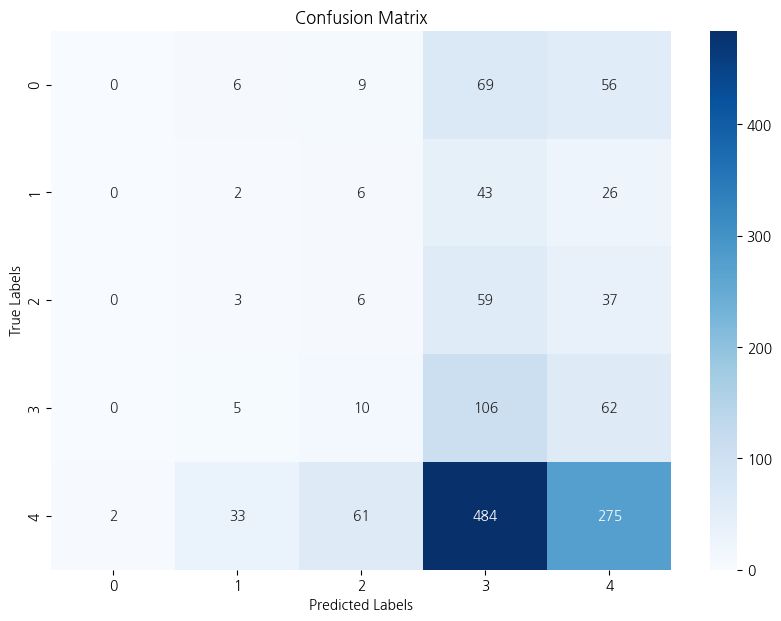

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# 예측된 레이팅을 반올림하여 정수형으로 변환
y_pred_rounded = np.round(y_pred)

cm = confusion_matrix(y_test[::-1], y_pred_rounded)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## 혼돈 행렬
계산상 예측 값은 +1되어야 함에 주의하자<br>
혼돈 행렬이다. 1~3점 사이의 값들은 대부분 3점으로 평가되어 있다.<br>
5점 리뷰는 5점으로 평가 경우가 295, 4점으로 평가된 경우가 518으로 그나마 높은 정확도를 보여준다.

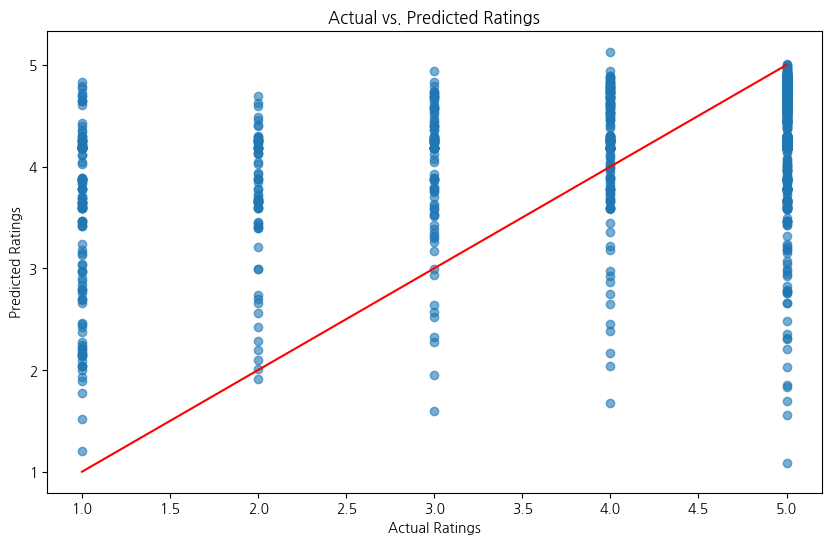

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')  # 대각선 추가
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()


ROC 곡선을 작성하였다.<br>
모델의 예측 결과과 유의미한 수준으로 보이지 않는다. 단 5점 리뷰인 경우 그나마 정확한 것으로 보인다.